In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import strip_accents_unicode

#To increase autocomplete response speed
%config IPCompleter.greedy=True

In [2]:
project_path = 'C:\\Users\\kunal\\MACHINE LEARNING PROJECTS\\CREDIT RISK ASSESSMENT'

In [3]:
cat_name = 'cat_result_eda.pickle'
num_name = 'num_result_eda.pickle'

In [4]:
cat = pd.read_pickle(project_path + '/02_Data/03_Work/' + cat_name)
num = pd.read_pickle(project_path + '/02_Data/03_Work/' + num_name)

In [5]:
cat.status.value_counts()

status
Fully Paid                                             66315
Current                                                54343
Charged Off                                            16446
Late (31-120 days)                                      1325
In Grace Period                                          524
Late (16-30 days)                                        282
Does not meet the credit policy. Status:Fully Paid       118
Does not meet the credit policy. Status:Charged Off       52
Default                                                    2
Name: count, dtype: int64

In [6]:
cat['target_pd'] = np.where(cat.status.isin(['Default',
                                             'Charged Off',
                                             'Does not meet the credit policy. Status:Charged Off']),1,0)
cat.drop(columns='status',inplace=True)

In [7]:
num['to_be_paid_amount'] = num.loan_amount - num.amortised_amount

In [8]:
num['target_ead'] = num.to_be_paid_amount/num.loan_amount

In [9]:
num['target_lgd'] = 1 - num.recovered_amount/num.to_be_paid_amount
num.target_lgd.fillna(0,inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_29968\1798352552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num.target_lgd.fillna(0,inplace=True)


In [10]:
cat.target_pd.value_counts(normalize=True)

target_pd
0    0.881642
1    0.118358
Name: proportion, dtype: float64

In [11]:
num[['target_ead','target_lgd']].describe().T

,count,mean,std,min,25%,50%,75%,max
target_ead,139407.0,0.337926,0.369471,-0.000012,0.0,0.130824,0.726128,1.0
target_lgd,139407.0,0.509251,0.490327,-0.275957,0.0,0.851073,1.000000,1.0


In [12]:
num.target_ead.clip(0,1,inplace=True)
num.target_lgd.clip(0,1,inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_29968\2830589201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num.target_ead.clip(0,1,inplace=True)
C:\Users\kunal\AppData\Local\Temp\ipykernel_29968\2830589201.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [13]:
num[['target_ead','target_lgd']].describe().T

,count,mean,std,min,25%,50%,75%,max
target_ead,139407.0,0.337926,0.369471,0.0,0.0,0.130824,0.726128,1.0
target_lgd,139407.0,0.509274,0.490300,0.0,0.0,0.851073,1.000000,1.0


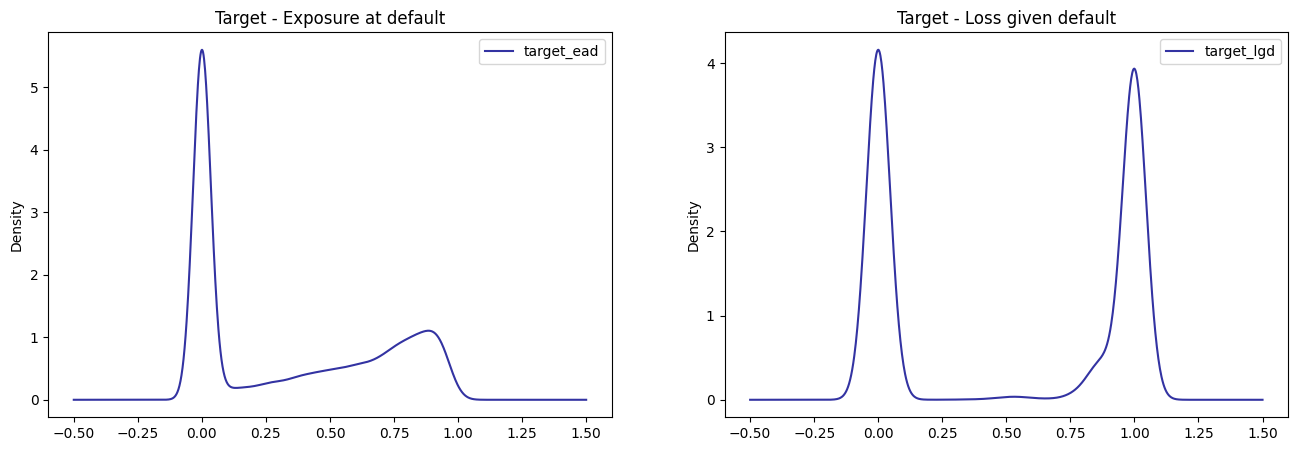

In [14]:
num[['target_ead','target_lgd']].plot(subplots=True ,kind='kde', layout=(1,2), figsize=(16,5), color=['darkblue','darkblue'],
                                      alpha=0.8, title=['Target - Exposure at default','Target - Loss given default']);

In [15]:
cat['home_ownership'] = cat.home_ownership.replace(['ANY','OTHER','NONE'],'MORTGAGE')

cat['purpose'] = cat.purpose.replace(['wedding','renewable_energy','educational'],'other')

cat['p_credit_cards_exceeding_75p_disc'] = pd.cut(num['p_credit_cards_exceeding_75p'], 
                                                  [-float("inf"), 20, 80, float("inf")], 
                                                  labels = ['00_Under_20p','01_20p_80p','02_Over_80p'])

In [16]:
var_ohe = ['term', 'home_ownership', 'purpose']

In [17]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

In [18]:
cat_ohe = ohe.fit_transform(cat[var_ohe])

In [19]:
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())

In [20]:
var_oe = ['employment_length','scoring']

In [21]:
order_employment_length = ['Unknown','< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years',
                           '8 years','9 years','10+ years']

order_scoring = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
oe = OrdinalEncoder(categories = [order_employment_length,order_scoring],
                    handle_unknown = 'use_encoded_value',
                    unknown_value = 12)

In [23]:
cat_oe = oe.fit_transform(cat[var_oe])

In [24]:
#Adding suffixes to feature names
names_oe = [feature + '_oe' for feature in var_oe]

#Saving as dataframe
cat_oe = pd.DataFrame(cat_oe, columns = names_oe)

In [25]:
var_te = ['employment_title', 'income_verification', 'p_credit_cards_exceeding_75p_disc']

In [26]:
te = TargetEncoder(min_samples_leaf=100, return_df = False)

In [27]:
cat_te_pd = te.fit_transform(cat[var_te], y = cat[['target_pd']])
cat_te_ead = te.fit_transform(cat[var_te], y = num[['target_ead']])
cat_te_lgd = te.fit_transform(cat[var_te], y = num[['target_lgd']])

In [28]:
#Adding suffixes to feature names
names_te_pd = [feature + '_te_pd' for feature in var_te]
names_te_ead = [feature + '_te_ead' for feature in var_te]
names_te_lgd = [feature + '_te_lgd' for feature in var_te]

#Saving as dataframe
cat_te_pd = pd.DataFrame(cat_te_pd, columns = names_te_pd)
cat_te_ead = pd.DataFrame(cat_te_ead, columns = names_te_ead)
cat_te_lgd = pd.DataFrame(cat_te_lgd, columns = names_te_lgd)

In [29]:
stop_words = pd.read_csv(project_path + '/01_Documents/nlp_stop_words.txt', names = ['word'])
stop_words['word_clean'] = stop_words.word.transform(strip_accents_unicode)

In [30]:
tfidf = TfidfVectorizer(strip_accents = 'unicode',
                        stop_words = stop_words.word_clean.to_list(),
                        max_df = 0.7,
                        min_df = 50,
                        ngram_range = (1,3),
                        max_features = 50)

In [31]:
chars_to_replace = ['\d+','//','>','br']

description = tfidf.fit_transform(cat.description.transform(strip_accents_unicode) \
                                     .str.replace('|'.join(chars_to_replace), '', regex=True))

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kunal\AppData\Local\Temp\ipykernel_29968\3026936738.py:1: SyntaxWarning: invalid escape sequence '\d'
  chars_to_replace = ['\d+','//','>','br']
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'daren', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'itse', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [32]:
tfidf.vocabulary_

{'borrower': 1,
 'loan': 28,
 'borrower loan': 5,
 'credit': 16,
 'card': 10,
 'debt': 20,
 'pay': 36,
 'payment': 40,
 'cards': 12,
 'higher': 26,
 'consolidate': 13,
 'payments': 41,
 'month': 33,
 'credit card': 17,
 'card debt': 11,
 'loan pay': 30,
 'credit cards': 19,
 'credit card debt': 18,
 'years': 49,
 'borrower consolidate': 2,
 'consolidate credit': 14,
 'free': 22,
 'pay credit': 37,
 'year': 48,
 'business': 8,
 'bills': 0,
 'rates': 44,
 'work': 47,
 'monthly': 34,
 'paying': 39,
 'rate': 43,
 'time': 46,
 'plan': 42,
 'car': 9,
 'loans': 31,
 'good': 23,
 'job': 27,
 'borrower pay': 6,
 'money': 32,
 'borrower pay credit': 7,
 'loan consolidate': 29,
 'pay credit cards': 38,
 'consolidation': 15,
 'borrower debt': 4,
 'debt consolidation': 21,
 'borrower credit': 3,
 'high': 24,
 'high credit': 25,
 'stable': 45,
 'paid': 35}

In [33]:
cat.drop(columns='description',inplace=True)

In [34]:
var_bin = ['n_derogations']

In [35]:
binarizer = Binarizer(threshold=0)

In [36]:
num_bin = binarizer.fit_transform(num[var_bin])

In [37]:
#Adding suffixes to feature names
names_bin = [feature + '_bin' for feature in var_bin]

#Saving as dataframe
num_bin = pd.DataFrame(num_bin,columns = names_bin)

In [38]:
var_qt = ['annual_income', 'dti', 'installment', 'interest_rate', 'loan_amount',  
           'n_credit_lines', 'n_mortages', 'revolving_utilization']

In [39]:
qt = QuantileTransformer(output_distribution='normal')

In [40]:
num_qt = qt.fit_transform(num[var_qt])

In [41]:
#Adding suffixes to feature names
names_qt = [feature + '_qt' for feature in var_qt]

#Saving as dataframe
num_qt = pd.DataFrame(num_qt,columns = names_qt)

In [42]:
# PD model:
df_res_pd = pd.concat([cat_oe,cat_te_pd,num_qt],axis=1)

# EAD model:
df_res_ead = pd.concat([cat_oe,cat_te_ead,num_qt],axis=1)

# LGD model:
df_res_lgd = pd.concat([cat_oe,cat_te_lgd,num_qt],axis=1)

In [43]:
# PD model:
var_mms_pd = df_res_pd.columns

# EAD model:
var_mms_ead = df_res_ead.columns

# LGD model:
var_mms_lgd = df_res_lgd.columns

In [44]:
mms = MinMaxScaler()

In [45]:
# PD model:
df_mms_pd = mms.fit_transform(df_res_pd[var_mms_pd])

# EAD model:
df_mms_ead = mms.fit_transform(df_res_ead[var_mms_ead])

# LGD model:
df_mms_lgd = mms.fit_transform(df_res_lgd[var_mms_lgd])

In [46]:
# Adding suffixes to feature names
    # PD model:
names_mms_pd = [feature + '_mms' for feature in var_mms_pd]
    # EAD model:
names_mms_ead = [feature + '_mms' for feature in var_mms_ead]   
    # LGD model:
names_mms_lgd = [feature + '_mms' for feature in var_mms_lgd]


# Saving as dataframe
    # PD model:
df_mms_pd = pd.DataFrame(df_mms_pd,columns = names_mms_pd)
    # EAD model:
df_mms_ead = pd.DataFrame(df_mms_ead,columns = var_mms_ead)   
    # LGD model:
df_mms_lgd = pd.DataFrame(df_mms_lgd,columns = var_mms_lgd)

In [47]:
to_include_pd = [cat_ohe, num_bin, df_mms_pd, cat.reset_index()[['client_id','target_pd']]]

In [48]:
df_pd = pd.concat(to_include_pd,axis=1).set_index('client_id')

In [49]:
to_include_ead = [cat_ohe, num_bin, df_mms_ead, num.reset_index()[['client_id','target_ead']]]

In [50]:
df_ead = pd.concat(to_include_ead,axis=1).set_index('client_id')

In [51]:
to_include_lgd = [cat_ohe, num_bin, df_mms_lgd, num.reset_index()[['client_id','target_lgd']]]

In [52]:
df_lgd = pd.concat(to_include_lgd,axis=1).set_index('client_id')

In [53]:
path_df_input_pd = project_path + '/02_Data/03_Work/' + 'df_input_pd.pickle'
path_df_input_ead = project_path + '/02_Data/03_Work/' + 'df_input_ead.pickle'
path_df_input_lgd = project_path + '/02_Data/03_Work/' + 'df_input_lgd.pickle'

In [54]:
df_pd.to_pickle(path_df_input_pd)
df_ead.to_pickle(path_df_input_ead)
df_lgd.to_pickle(path_df_input_lgd)